In this notebook I am varying the input parameters to understand better how the modeling is really working

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import astropy.units as u

import sys
sys.path.append('/home/woody/caph/mppi062h/software/gamera/GAMERA/lib')

In [29]:
names= ['Fermi', 'HESS']
colors = ['red', 'blue']
unit_y= "E"+r"$^2$"+"dN/dE (erg/cm^2/s)"
unit_x = 'eV'

In [3]:
flux_points = []
for name in names:
    with open(f'data_from_paper/{name}.csv', newline='') as csvfile:
        reader = csv.reader(csvfile)
        fp_name = []
        for row in reader:
            fp_name.append(row)
    flux_points.append(np.asarray(fp_name, dtype=float))

In [1]:
pwd

'/home/vault/caph/mppi062h/repositories/GC/gamera'

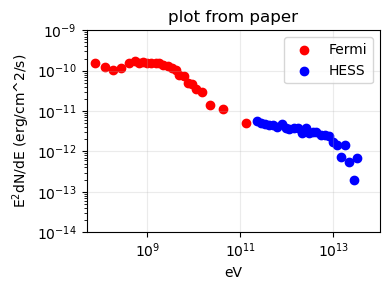

In [35]:
fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=100)

for i, fp_name in enumerate(flux_points):
    ax.scatter(fp_name[:, 0], fp_name[:, 1], color=colors[i], label=names[i])
ax.set_ylabel(unit_y)
ax.set_xlabel(unit_x)
ax.grid(alpha=0.25)
ax.set_ylim(1e-14, 1e-9)
ax.set_xlim(5e7, 1e14)
ax.legend()
ax.loglog()
ax.set_title('plot from paper')
plt.tight_layout()
fig.savefig(f'saving_plots/1.png')

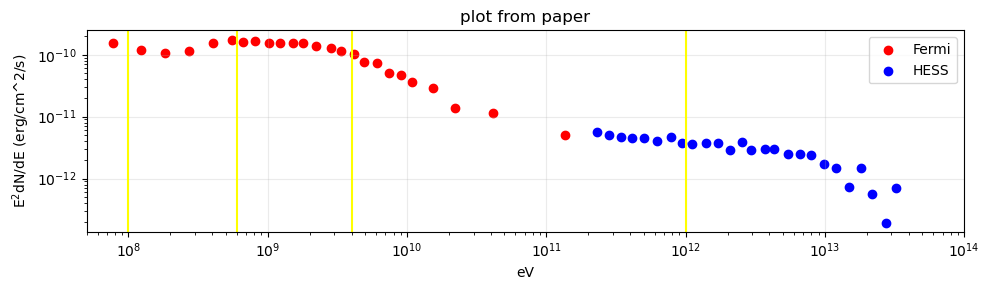

In [38]:
fig, ax = plt.subplots(1,1, figsize=(10, 3), dpi=100)

for i, fp_name in enumerate(flux_points):
    plt.scatter(fp_name[:, 0], fp_name[:, 1], color=colors[i], label=names[i])
    

plt.axvline(1e8, color='yellow')
plt.axvline(6e8, color='yellow')
plt.axvline(4e9, color='yellow')
plt.axvline(1e12, color='yellow')

plt.ylabel(unit_y)
plt.xlabel(unit_x)
plt.grid(alpha=0.25)
#plt.ylim(1e-14, 1e-9)
plt.xlim(5e7, 1e14)
plt.legend()
plt.loglog()
plt.title('plot from paper')
plt.tight_layout()
fig.savefig(f'saving_plots/2.png')

### introdcuting gamera package

In [5]:
import sys
sys.path.append('/home/woody/caph/mppi062h/software/gamera/GAMERA/lib')
import gappa as gp

In [6]:
# general parameters
fu = gp.Utils()
e_ref = 1*gp.TeV_to_erg # define reference energy as 100 TeV
bins = 500
energy_in_erg_pl = np.logspace(-6,3,bins) * gp.TeV_to_erg 

In [7]:
std_dic = {
    'b_field' : 2e-4, # in Gauss, necessary for Synchrotron calculation
    'density' : 1e3, # 1/cm^3, necessary for Bremsstrahlung and hadronic emission
    # radiation field parameters, necessary for Inverse-Compton radiation. 
    'age' : 1e4, # yrs time to cool down with IC
    'distance' : 8e3, # in pc
    't_cmb' : 2.7, 'edens_cmb' : 0.26*gp.eV_to_erg,
    't_UV' : 3, 'edens_UV' : 5e4*gp.eV_to_erg,
    't_NIR' : 0.3, 'edens_NIR' : 5e4*gp.eV_to_erg,
    't_FIR' : 6e-3, 'edens_FIR' : 5e2*gp.eV_to_erg,

    # Defining particle spectrum
    'alpha_pl' : 2,
    'e_total_pl' : 6.7e36, # erg/s 
    'E_0' : 100*gp.TeV_to_erg,
}

# Standard values

In [8]:
def plot_parent_spectrum(power_law_spectrum, label):
    plt.loglog(power_law_spectrum[:,0], power_law_spectrum[:,1], label=label)
    plt.xlabel("Energy (erg)")
    plt.ylabel("dN/dE (1/erg)")
    plt.legend()
    plt.title("particle spectra")
    plt.grid()

    
def plotting(plot_list, name_list, legend_flag=True):
    sed, tot, ic, brems, synch = plot_list[0], plot_list[1], plot_list[2], plot_list[3], plot_list[4]
    
    #### make a plot #####
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
    ax1.set_prop_cycle('color',plt.get_cmap('plasma_r')(np.linspace(0.2, .8, 2)))  #
    ax2.set_prop_cycle('color',plt.get_cmap('plasma')(np.linspace(0., .8, 4)))  #
    
    for i in range(len(sed)):
        if i == 0:
            ls = '-' 
        else: 
            ls = ':'
        ax1.loglog(sed[i][:,0],sed[i][:,1],ls=ls,label=name_list[i])
        
        ax2.loglog(tot[i][:,0],tot[i][:,1],ls=ls,label="total",lw=3,alpha=0.3)
        ax2.loglog(synch[i][:,0],synch[i][:,1],ls=ls,label="synch")
        ax2.loglog(brems[i][:,0],brems[i][:,1],ls=ls,label="brems")
        ax2.loglog(ic[i][:,0],ic[i][:,1],linestyle=ls,label="IC")
    
    ax1.set_xlabel("E (TeV)")
    ax1.set_ylabel("E"+r"$^2$"+"dN/dE (erg)")
    ax1.grid()
    ax1.legend()
    ax1.set_xlim(xmin=1e-6,xmax=2e3)
    ax1.set_title("Particle SED")

    for i, fp_name in enumerate(flux_points):
        ax2.scatter(fp_name[:, 0]*1e-12, fp_name[:, 1], color=colors[i], label=names[i])
    ax2.set_xlabel("E (TeV)")
    ax2.set_ylabel("E"+r"$^2$"+"dN/dE (erg/cm^2/s)")
    if legend_flag:
        ax2.legend(ncol=2,prop={'size':12})
    ax2.grid()
    ax2.set_xlim(xmin=1e-6,xmax=1e4)
    ax2.set_ylim(ymin=1e-15,ymax=1e-8)
    ax2.set_title("Radiation SED")
    
    plt.show()

In [9]:
def funtion_print(type_name='std', dic=std_dic):
    print(f'testing version {type_name}\n')
    for par in dic:
        print(f'{par}={dic[par]}')
    
def fp_type(type_name='std', dic=std_dic):
    '''In each case you can define a new environment model.
    In case of standard, it is the same as for Jims paper, biut for SgrA*
    if you want to do it similar as standard, just put the dictionary there.'''    
    funtion_print(type_name, dic)
            
    if type_name == 'version1':
        power_law = ((energy_in_erg_pl/e_ref)**-dic['alpha_pl'])
    else:
        power_law = ((energy_in_erg_pl/e_ref)**-dic['alpha_pl'])*np.e**(-energy_in_erg_pl/dic['E_0'])
    power_law *= dic['e_total_pl'] / fu.Integrate(list(zip(energy_in_erg_pl,power_law * energy_in_erg_pl)))
    power_law_spectrum = np.array(list(zip(energy_in_erg_pl,power_law)))
    plot_parent_spectrum(power_law_spectrum, label=type_name)
    
    fp = gp.Particles()

    # set the fields in the Radiation object
    fp.SetBField(dic['b_field'])
    fp.SetAmbientDensity(dic['density'])
    fp.SetAge(dic['age'])

    fp.AddThermalTargetPhotons(dic['t_UV'], dic['edens_UV'],bins)
    fp.AddThermalTargetPhotons(dic['t_FIR'], dic['edens_FIR'],bins)
    fp.AddThermalTargetPhotons(dic['t_NIR'], dic['edens_NIR'],bins)
    fp.AddThermalTargetPhotons(dic['t_cmb'], dic['edens_cmb'],bins)

    fp.SetCustomInjectionSpectrum(power_law_spectrum)
    fp.SetSolverMethod(1)
    fp.CalculateElectronSpectrum()

    sp = np.array(fp.GetParticleSpectrum())
    sed = np.array(fp.GetParticleSED())

    fr = gp.Radiation()
    fr.AddArbitraryTargetPhotons(fp.GetTargetPhotons()) # output from 'Particles' is in the right format to be used in 'Radiation'
    fr.SetBField(dic['b_field'])

    fr.SetAmbientDensity(dic['density'])
    fr.SetDistance(dic['distance']) # optional, in parsec. If not set or equals zero, luminosity instead of flux will be calculated
    fr.SetElectrons(sp)
    fr.CalculateDifferentialPhotonSpectrum(np.logspace(-19,3,int(bins/2)) * gp.TeV_to_erg)

    
    tot = np.array(fr.GetTotalSED())
    ic = np.array(fr.GetICSED())
    brems = np.array(fr.GetBremsstrahlungSED())
    synch = np.array(fr.GetSynchrotronSED())
    
    return [sed, tot, ic, brems, synch]

### version 3, version 4, verion 5

testing version std

b_field=0.0002
density=1000.0
age=10000.0
distance=8000.0
t_cmb=2.7
edens_cmb=4.1652000000000003e-13
t_UV=3
edens_UV=8.01e-08
t_NIR=0.3
edens_NIR=8.01e-08
t_FIR=0.006
edens_FIR=8.01e-10
alpha_pl=2
e_total_pl=6.7e+36
E_0=160.20000000000002
Radiation::AddThermalTargetPhotons: energy density of radiation field insane. Are you sure of this?
Radiation::AddThermalTargetPhotons: energy density of radiation field insane. Are you sure of this?
___________________________________
>> STARTING NEW PARTICLE EVOLUTION 
   (-> electrons)     
>> CALCULATING IC LOSS LOOKUP 
   testing version version2

b_field=0.0002
density=1000.0
age=100.0
distance=8000.0
t_cmb=2.7
edens_cmb=4.1652000000000003e-13
t_UV=3
edens_UV=8.01e-08
t_NIR=0.3
edens_NIR=8.01e-08
t_FIR=0.006
edens_FIR=8.01e-10
alpha_pl=2
e_total_pl=6.7e+36
E_0=160.20000000000002
    99% done
    -> DONE!   

>> COMPUTATION OF IC LOSS LOOKUP COMPLETE 

** Evolving Electron Spectrum:
>> PARTICLE EVOLUTION DONE. EXITING.

_____

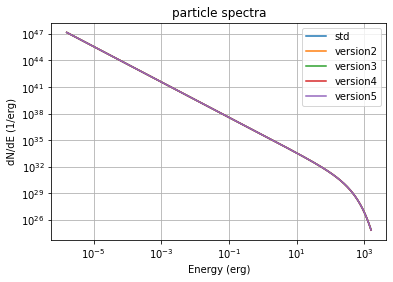

In [12]:
name_list = ['std', 'version2', 'version3', 'version4', 'version5']
dic_2 = std_dic.copy()
dic_2['age'] = 1e2

dic_3 = std_dic.copy()
dic_3['age'] = 3e0

dic_4 = std_dic.copy()
dic_4['age'] = 1e1

dic_5 = std_dic.copy()
dic_5['age'] = 1e7

dic_list = [std_dic, dic_2, dic_3, dic_4, dic_5]

mega_list = []
for type_name, dic in zip(name_list, dic_list):
    mega_list.append(fp_type(type_name=type_name, dic=dic))

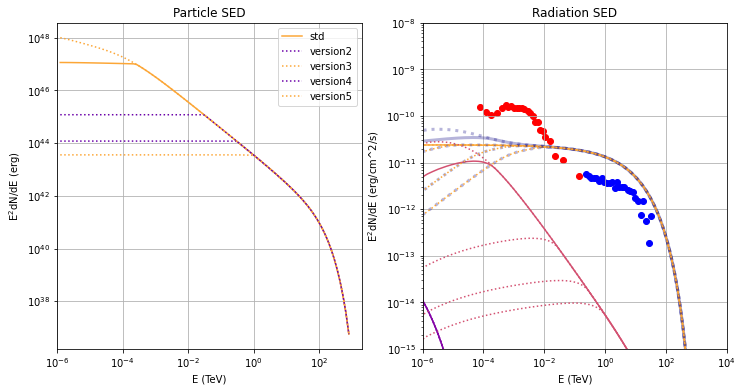

In [13]:
plot_list = []
for i in range(len(mega_list[0])):
    p_list = []
    for l in mega_list:
        p_list.append(l[i])
    plot_list.append(p_list)
    
plotting(plot_list, name_list, legend_flag=False)

### version2

- t_cool IC < 100 years
- longer time does not change the bremsstrahlung shape, but it shifts it to lower energies and higher normalization

testing version std

b_field=0.0002
density=1000.0
age=10000.0
distance=8000.0
t_cmb=2.7
edens_cmb=4.1652000000000003e-13
t_UV=3
edens_UV=8.01e-08
t_NIR=0.3
edens_NIR=8.01e-08
t_FIR=0.006
edens_FIR=8.01e-10
alpha_pl=2
e_total_pl=6.7e+36
E_0=160.20000000000002
Radiation::AddThermalTargetPhotons: energy density of radiation field insane. Are you sure of this?
Radiation::AddThermalTargetPhotons: energy density of radiation field insane. Are you sure of this?
___________________________________
>> STARTING NEW PARTICLE EVOLUTION 
   (-> electrons)     
>> CALCULATING IC LOSS LOOKUP 
   testing version version2

b_field=0.0002
density=1000.0
age=100.0
distance=8000.0
t_cmb=2.7
edens_cmb=4.1652000000000003e-13
t_UV=3
edens_UV=8.01e-08
t_NIR=0.3
edens_NIR=8.01e-08
t_FIR=0.006
edens_FIR=8.01e-10
alpha_pl=2
e_total_pl=6.7e+36
E_0=160.20000000000002
    99% done
    -> DONE!   

>> COMPUTATION OF IC LOSS LOOKUP COMPLETE 

** Evolving Electron Spectrum:
>> PARTICLE EVOLUTION DONE. EXITING.

_____

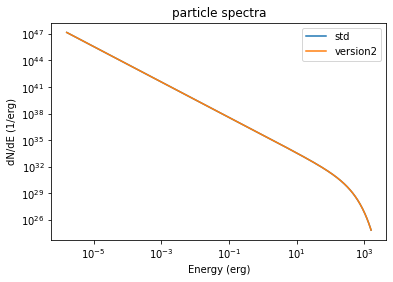

In [16]:
name_list = ['std', 'version2']
dic = std_dic.copy()
dic['age'] = 1e2
dic_list = [std_dic, dic]

mega_list = []
for type_name, dic in zip(name_list, dic_list):
    mega_list.append(fp_type(type_name=type_name, dic=dic))

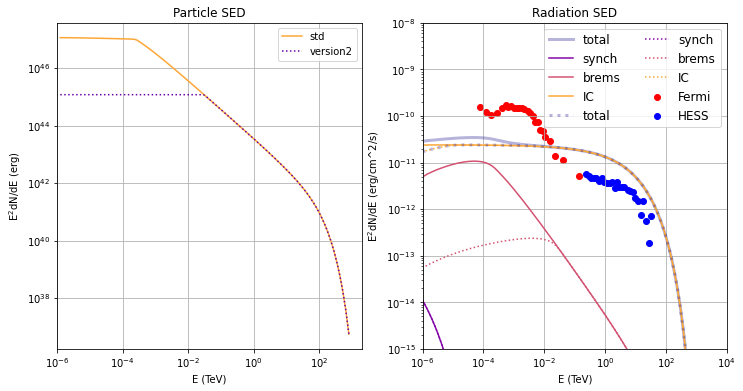

In [17]:
plot_list = []
for i in range(len(mega_list[0])):
    p_list = []
    for l in mega_list:
        p_list.append(l[i])
    plot_list.append(p_list)
    
plotting(plot_list, name_list)

### version1

def: std-version 1, change in the high energy part of the parent particle spectrum

- The change in the high energy does not influence the low energy processes (brems and syn)
- It is possible to observe the KN cutoff, but it is higher than the measured data, it is because the radiation field is extremely strong 
- the IC emission will follow closely the shape of the initial parent particle, til the KN cutoff

testing version std

b_field=0.0002
density=1000.0
age=10000.0
distance=8000.0
t_cmb=2.7
edens_cmb=4.1652000000000003e-13
t_UV=3
edens_UV=8.01e-08
t_NIR=0.3
edens_NIR=8.01e-08
t_FIR=0.006
edens_FIR=8.01e-10
alpha_pl=2
e_total_pl=6.7e+36
E_0=160.20000000000002
Radiation::AddThermalTargetPhotons: energy density of radiation field insane. Are you sure of this?
Radiation::AddThermalTargetPhotons: energy density of radiation field insane. Are you sure of this?
___________________________________
>> STARTING NEW PARTICLE EVOLUTION 
   (-> electrons)     
>> CALCULATING IC LOSS LOOKUP 
   testing version version1

b_field=0.0002
density=1000.0
age=10000.0
distance=8000.0
t_cmb=2.7
edens_cmb=4.1652000000000003e-13
t_UV=3
edens_UV=8.01e-08
t_NIR=0.3
edens_NIR=8.01e-08
t_FIR=0.006
edens_FIR=8.01e-10
alpha_pl=2
e_total_pl=6.7e+36
E_0=160.20000000000002
    99% done
    -> DONE!   

>> COMPUTATION OF IC LOSS LOOKUP COMPLETE 

** Evolving Electron Spectrum:
>> PARTICLE EVOLUTION DONE. EXITING.

___

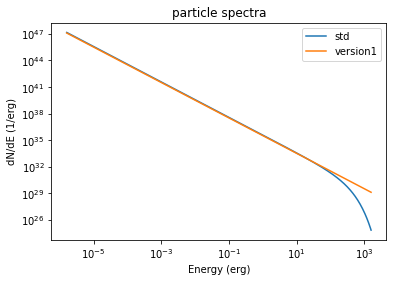

In [10]:
name_list = ['std', 'version1']

mega_list = []
for type_name in name_list:
    mega_list.append(fp_type(type_name=type_name))

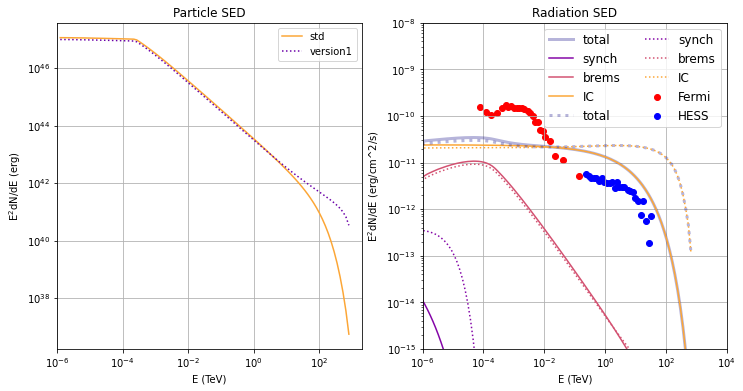

In [11]:
plot_list = []
for i in range(len(mega_list[0])):
    p_list = []
    for l in mega_list:
        p_list.append(l[i])
    plot_list.append(p_list)
    
plotting(plot_list, name_list)